In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (722, 21)


,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


In [4]:
df.isnull().sum()


ticker                   0
name                     0
currency                 0
exchange                 0
industry                13
logo                    20
weburl                  16
environment_grade        0
environment_level        0
social_grade             0
social_level             0
governance_grade         0
governance_level         0
environment_score        0
social_score             0
governance_score         0
total_score              0
last_processing_date     0
total_grade              0
total_level              0
cik                      0
dtype: int64

In [5]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print("Duplicates Removed:", before - after)


Duplicates Removed: 0


In [7]:
score_cols = ['environment_score','social_score','governance_score','total_score']

for col in score_cols:
 df[col] = df[col].fillna(df[col].mean())



In [8]:
df['industry'] = df['industry'].fillna("Not Specified")
df['exchange'] = df['exchange'].fillna("Unknown")


In [9]:
df.head(10)


,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258
5,lvs,Las Vegas Sands Corp,USD,"NEW YORK STOCK EXCHANGE, INC.",Hotels Restaurants and Leisure,https://static.finnhub.io/logo/7256a9be-8279-1...,https://www.sands.com/,A,High,BB,...,BB,Medium,547,318,313,1178,18-04-2022,BBB,High,1300514
6,clx,Clorox Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/a67c34fe-80eb-1...,https://www.thecloroxcompany.com/,A,High,BB,...,BB,Medium,560,350,345,1255,16-04-2022,A,High,21076
7,aacg,ATA Creativity Global,CNY,NASDAQ NMS - GLOBAL MARKET,Diversified Consumer Services,https://static2.finnhub.io/file/publicdatany/f...,http://www.ata.net.cn,B,Medium,B,...,B,Medium,203,200,205,608,01-07-2022,B,Medium,1420529
8,aal,American Airlines Group Inc,USD,NASDAQ NMS - GLOBAL MARKET,Airlines,https://static2.finnhub.io/file/publicdatany/f...,https://americanairlines.gcs-web.com/,B,Medium,B,...,B,Medium,270,211,265,746,16-04-2022,B,Medium,6201
9,aame,Atlantic American Corp,USD,NASDAQ NMS - GLOBAL MARKET,Insurance,https://static.finnhub.io/logo/6b536b3e-826a-1...,http://www.atlam.com/,B,Medium,B,...,BB,Medium,220,221,300,741,16-04-2022,B,Medium,8177


In [10]:
print("Dataset Shape After Cleaning:", df.shape)
df.isnull().sum()


Dataset Shape After Cleaning: (722, 21)


ticker                   0
name                     0
currency                 0
exchange                 0
industry                 0
logo                    20
weburl                  16
environment_grade        0
environment_level        0
social_grade             0
social_level             0
governance_grade         0
governance_level         0
environment_score        0
social_score             0
governance_score         0
total_score              0
last_processing_date     0
total_grade              0
total_level              0
cik                      0
dtype: int64

In [11]:
# Summary of numerical columns
df.describe()


,environment_score,social_score,governance_score,total_score,cik
count,722.000000,722.000000,722.000000,722.000000,7.220000e+02
mean,404.806094,292.182825,278.761773,975.750693,9.897925e+05
std,145.103870,57.017406,47.031536,218.751796,5.816815e+05
min,200.000000,160.000000,75.000000,600.000000,1.800000e+03
25%,240.000000,243.000000,235.000000,763.000000,7.231572e+05
50%,483.000000,302.000000,300.000000,1046.000000,1.046189e+06
75%,518.750000,322.750000,310.000000,1144.000000,1.470094e+06
max,719.000000,667.000000,475.000000,1536.000000,1.914023e+06


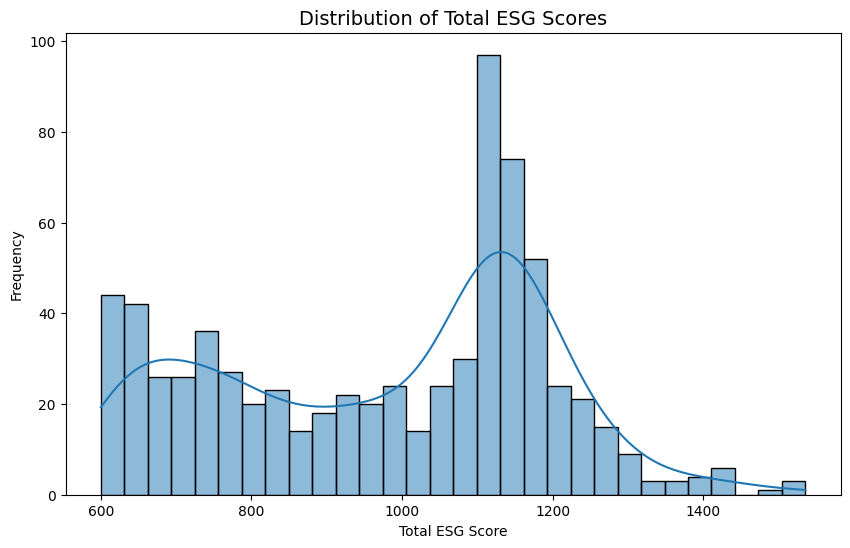

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['total_score'], bins=30, kde=True)
plt.title("Distribution of Total ESG Scores", fontsize=14)
plt.xlabel("Total ESG Score")
plt.ylabel("Frequency")
plt.show()


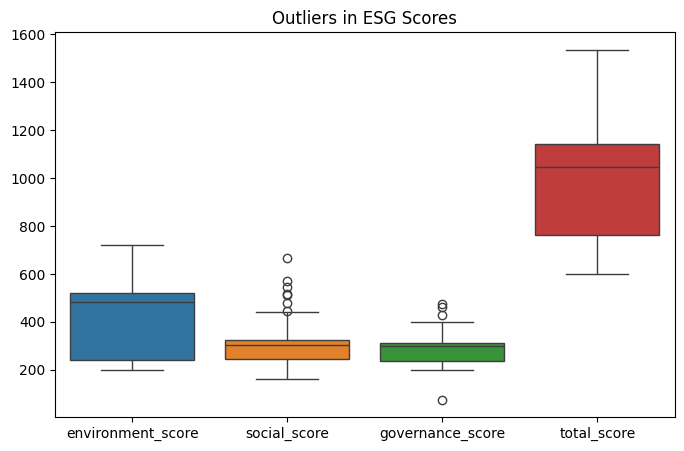

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['environment_score','social_score','governance_score','total_score']])
plt.title("Outliers in ESG Scores")
plt.show()


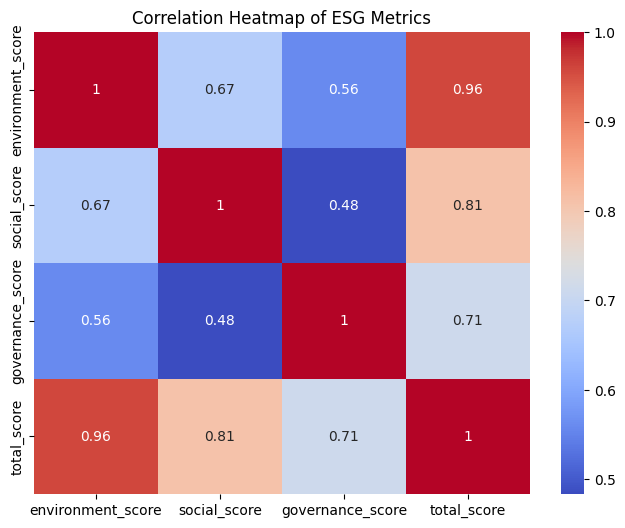

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['environment_score','social_score','governance_score','total_score']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of ESG Metrics")
plt.show()


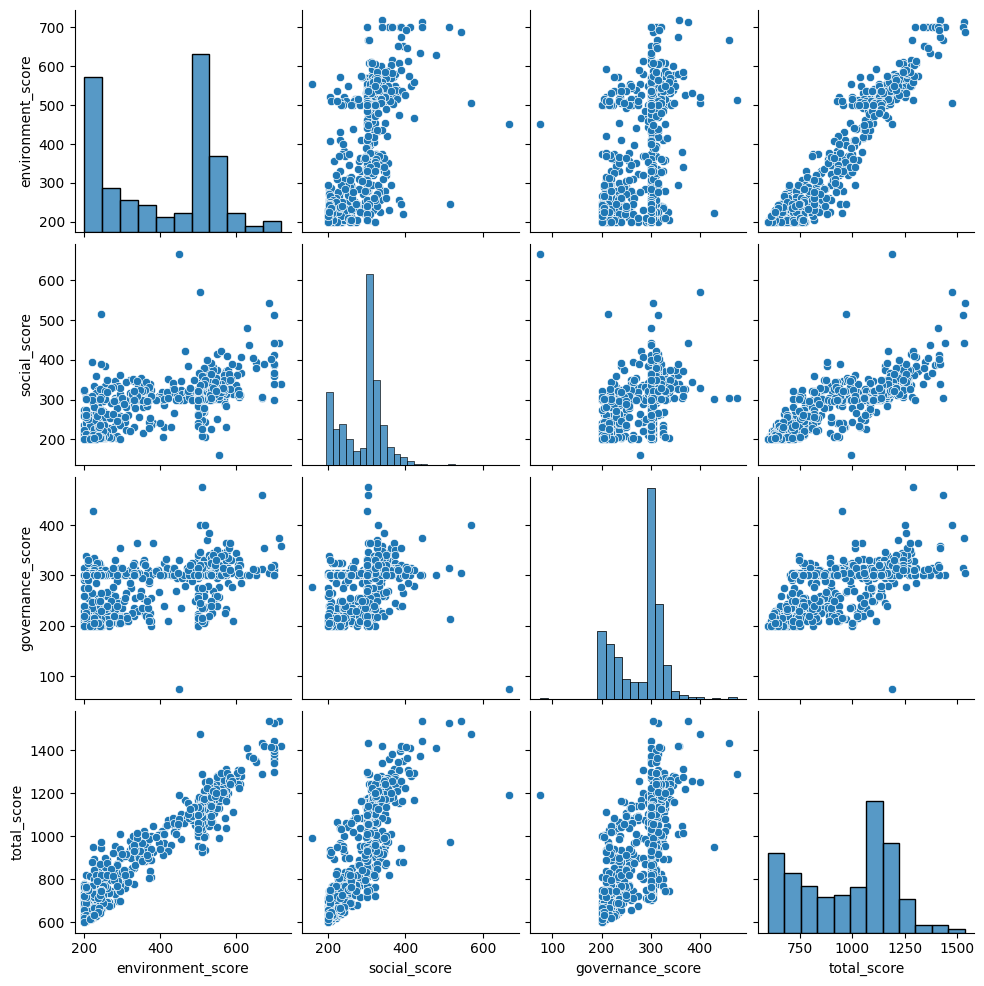

In [15]:
sns.pairplot(df[['environment_score','social_score','governance_score','total_score']])
plt.show()


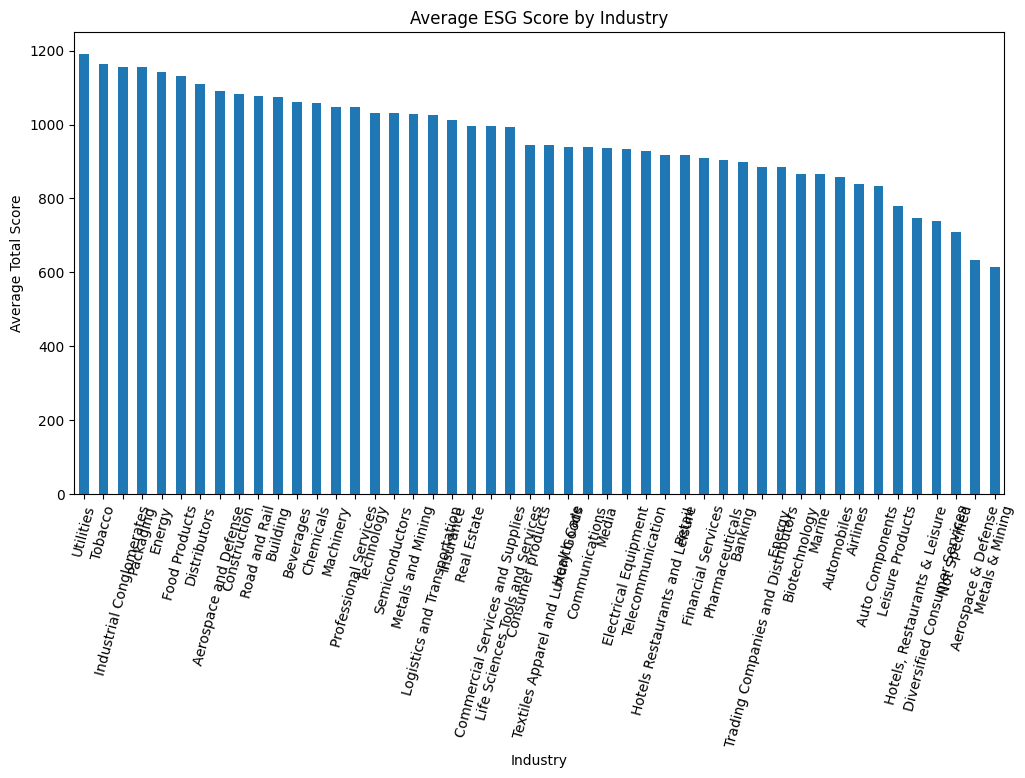

In [16]:
industry_avg = df.groupby('industry')['total_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
industry_avg.plot(kind='bar')
plt.title("Average ESG Score by Industry")
plt.ylabel("Average Total Score")
plt.xlabel("Industry")
plt.xticks(rotation=75)
plt.show()


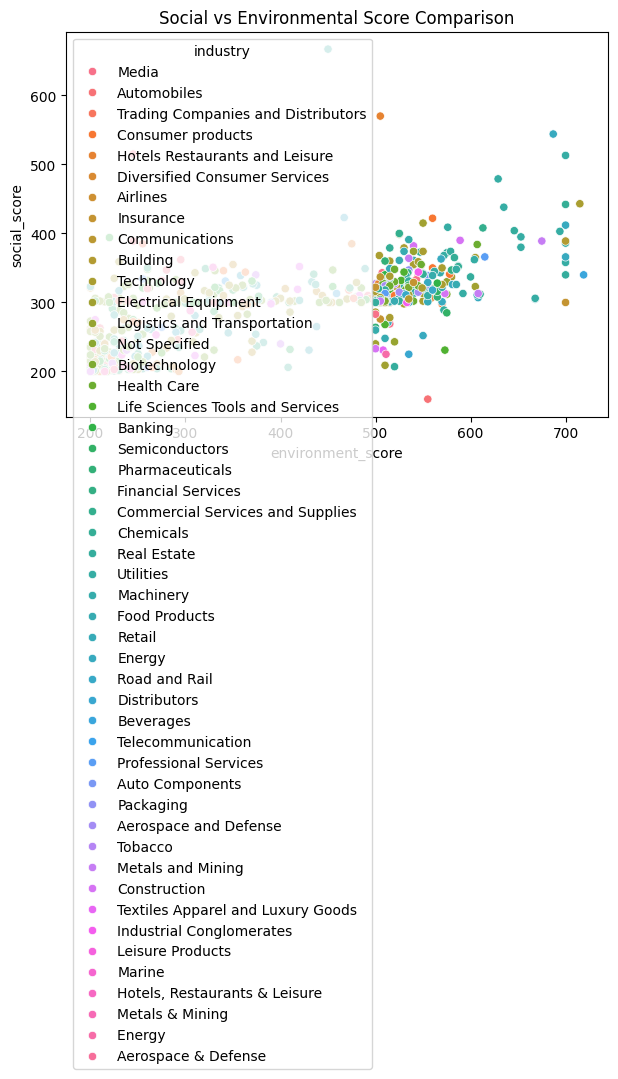

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='environment_score', y='social_score', hue='industry')
plt.title("Social vs Environmental Score Comparison")
plt.show()


In [18]:
df[['environment_score','social_score','governance_score']].corrwith(df['total_score']).sort_values(ascending=False)


environment_score    0.958551
social_score         0.810206
governance_score     0.711576
dtype: float64

In [19]:
df[['environment_score','social_score','governance_score','total_score']].describe()


,environment_score,social_score,governance_score,total_score
count,722.000000,722.000000,722.000000,722.000000
mean,404.806094,292.182825,278.761773,975.750693
std,145.103870,57.017406,47.031536,218.751796
min,200.000000,160.000000,75.000000,600.000000
25%,240.000000,243.000000,235.000000,763.000000
50%,483.000000,302.000000,300.000000,1046.000000
75%,518.750000,322.750000,310.000000,1144.000000
max,719.000000,667.000000,475.000000,1536.000000
